In [ ]:
# LET'S HAVE A RECALL....

items = [
         ('Item 1', 67),
         ('Item 2', 22),
         ('Item 3', 24),

]

def sort_items(item):
  return item[1]


items.sort(key= sort_items)
print(items)




[('Item 2', 22), ('Item 3', 24), ('Item 1', 67)]


In [ ]:
# Recap Numpy

import numpy as np

mylist = [[1, 2, 3, 4], [3, 4, 5, 3]]
myarray = np.array(mylist)

print(myarray)
print(myarray.shape)

[[1 2 3 4]
 [3 4 5 3]]
(2, 4)


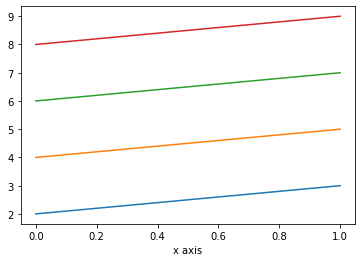

In [ ]:
import matplotlib.pyplot as plt
import  numpy as np

list_ = [[2, 4, 6, 8], [3, 5, 7, 9]]
myarray = np.array(list_)
plt.plot(myarray)
plt.xlabel('x axis')
#plt.ylabel('y axis')
plt.show()


In [ ]:
from sklearn import tree 
#sklearn.__version__


features = [[140, 0], [130, 1], [150, 0], [170, 1]]
labels = [0, 0, 1, 1]

clsf = tree.DecisionTreeClassifier()
clsf = clsf.fit(features, labels)
print(clsf.predict([[10, 1]]))


[0]


In [ ]:
#Working with Iris Dataset 
""" Goals:
>>> Import Dataset
>>> Train Classifier
>>> Predict label for new flower
"""

from sklearn.datasets import load_iris

iris = load_iris()
print(f'Features: {iris.feature_names}')
print(iris.target_names)
print(iris.target[0])
print(iris.data[0])


Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
0
[5.1 3.5 1.4 0.2]


In [ ]:
# Class Dataset, Pima Indians Diabetes, From Kaggle

from pandas import read_csv
from pandas import set_option
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions

filename = "/content/drive/MyDrive/Pima_Indians_Diabetes/diabetes.csv"
#filename = ""
#names = [' Preg ', ' Glu ', ' Pres ', ' Skin ', ' Test ', ' Mass', ' Pedi', ' Age ', ' Class ']
#data = read_csv(filename, names=names)
data = read_csv(filename,)

displaydata = data.head(4)
displaydata
#print(displaydata)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [ ]:
print(data.dtypes)
data.shape



Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


(768, 9)

In [ ]:
set_option('display.width', 100)
set_option('precision', 3)
description = data.describe()
description
#print(description)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [ ]:
data["Outcome"]

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

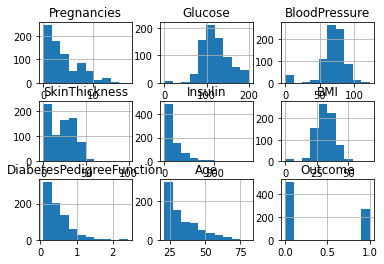

In [ ]:
data.hist()
pyplot.show()

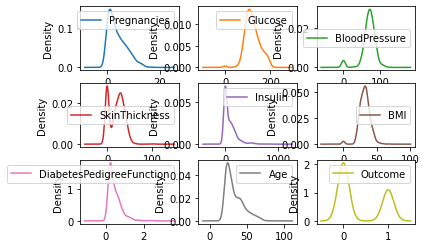

In [ ]:
data.plot(kind='density', subplots = True, layout=(3, 3), sharex=False)
pyplot.show()

In [ ]:
dataframe = read_csv(filename)
array = dataframe.values

#Separate array into input and output components
X = array[:, 0:8] #Select the columns to be considered
y = array[:, 8]

scaler = MinMaxScaler(feature_range=(0, 1)) # Define the scale range
rescaledX = scaler.fit_transform(X) # Transforms/Scales the selected values

#Summarize transformed data
set_printoptions(precision=1) # Highlights the number after dots (Float)
print(rescaledX[0:10, :]) #Prints the number of raws to be considered

[[0.4 0.7 0.6 0.4 0.  0.5 0.2 0.5]
 [0.1 0.4 0.5 0.3 0.  0.4 0.1 0.2]
 [0.5 0.9 0.5 0.  0.  0.3 0.3 0.2]
 [0.1 0.4 0.5 0.2 0.1 0.4 0.  0. ]
 [0.  0.7 0.3 0.4 0.2 0.6 0.9 0.2]
 [0.3 0.6 0.6 0.  0.  0.4 0.1 0.2]
 [0.2 0.4 0.4 0.3 0.1 0.5 0.1 0.1]
 [0.6 0.6 0.  0.  0.  0.5 0.  0.1]
 [0.1 1.  0.6 0.5 0.6 0.5 0.  0.5]
 [0.5 0.6 0.8 0.  0.  0.  0.1 0.6]]


In [ ]:
#dataframe.values[ : , : 8]


In [ ]:
# Calss of 18 june, 021
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Feature exctraction
test = SelectKBest(score_func = chi2, k=4)
fit = test.fit(X, y)

# Summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)

# Summarize selected features
print(features[0:5, :])


[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


In [ ]:
data.head()

#type(data.values)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# TITANIC SURVIVAL PREDICTION


from pandas import read_csv
from pandas import set_option
from matplotlib import pyplot
import numpy as np


filename = "/content/drive/MyDrive/Datasets_/titanic.csv"
titanic_data = read_csv(filename,)

displaydata = titanic_data.head()
displaydata

#print(displaydata)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.250
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.283
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.925
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.100
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.050


From the code above I import the necessary libraries to load and work with the dataset in csv format,

The libraries and packages imported are:
>>> We read the titanic csv file with read_cvs function from pandas

Dataset Contents:

>>> 0: Survived Indicator
>>> 1: Passenger Class
>>> 2: Name
>>> 3: Sex
>>> 4: Age
>>> 5: Siblings Aboard
>>> 6: Parents Aboard
>>> 7: Fare paid in £s

In [ ]:
# Dataset Description

#description = titanic_data.describe()
#description

With the Dataset description above we can see that only close to 38% out of the dataset passengers survived the Titanic. We can also see that the passenger ages range from 0.4 to 80, and the average age of passenges aboard is 29.

I infasise on the Age and Passenger class to see the How they affect the survival of Passengers aboard

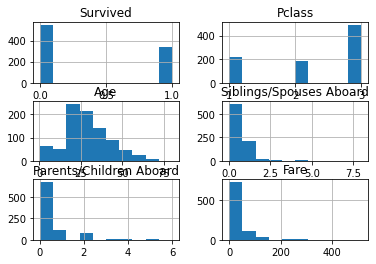

In [ ]:
"""From here we use display the Graph distribution of 
the data and for analysis on how effectively the particular data 
element would affect the likelyhood of a passenger to survive or not. 
For that we use the pyplot class from MatploLib."""

titanic_data.hist()
pyplot.show()

The medium ceparates those who will more likely survive and those who WON'T survive. 
From the displayed Graphs we can observe that:
>>> Survived: Around 250 passengers Survived and More than 400 did NOT survive
>>> Pclass: The passenger classes are distributed into 3 classes and the majority is on the right side

We as well observe that 

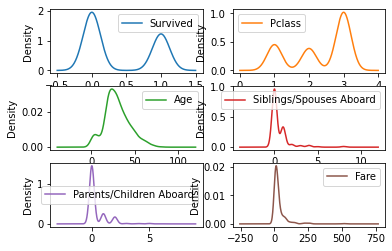

In [ ]:
#Density plot vizualisation

titanic_data.plot(kind='density', subplots = True, layout=(3, 2), sharex=False)
pyplot.show()

In [ ]:
# From YTB, The drop method, to get rid of unecessary columns in the Dataset
# The new_titanic will create a dataframe with no string values (Name)

new_titanic = titanic_data
new_titanic.drop(['Name'], axis=1, inplace=True)
new_titanic.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.250
1,1,1,female,38.0,1,0,71.283
2,1,3,female,26.0,0,0,7.925
3,1,1,female,35.0,1,0,53.100
4,0,3,male,35.0,0,0,8.050


In [ ]:
# To check the missing values, using the isnull() method

new_titanic.isnull().sum()

#No missing values found...
#If any, fill it with its mean value, eg: Missing values for 'Age'
#new_titanic['Age'].fillna(new_titanic['Age'].mean(), inplace=True)

Survived                   0
Pclass                     0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [ ]:
# Create a Dummie feature for Sex values and get rid of the string values
import pandas as pd

l_sex_dumies = pd.get_dummies(new_titanic['Sex'],drop_first=True) #create a new feature out of the sex values
new_titanic = pd.concat([new_titanic, l_sex_dumies], axis=1) #add the new feature in the dataframe

new_titanic.head()


,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male
0,0,3,male,22.0,1,0,7.250,1
1,1,1,female,38.0,1,0,71.283,0
2,1,3,female,26.0,0,0,7.925,0
3,1,1,female,35.0,1,0,53.100,0
4,0,3,male,35.0,0,0,8.050,1


In [ ]:
#Get rid of the Sex feature and other unecessary

new_titanic_ = new_titanic.drop(['Sex', 'Siblings/Spouses Aboard', 'Parents/Children Aboard'], axis=1, inplace=True)
new_titanic.head()

,Survived,Pclass,Age,Fare,male
0,0,3,22.0,7.250,1
1,1,1,38.0,71.283,0
2,1,3,26.0,7.925,0
3,1,1,35.0,53.100,0
4,0,3,35.0,8.050,1


In [ ]:
#Scaling the values for Age and Fare (Too large)
from sklearn.preprocessing import StandardScaler #Import the std scaler

# Working with the std scaler as stds
stds = StandardScaler() 
feature_scale = ['Age', 'Fare'] # Defines the features to scale

#Scale the features in the dataset
new_titanic[feature_scale] = stds.fit_transform(new_titanic[feature_scale])
new_titanic.head()


,Survived,Pclass,Age,Fare,male
0,0,3,-0.529,-0.504,1
1,1,1,0.604,0.783,0
2,1,3,-0.246,-0.490,0
3,1,1,0.392,0.418,0
4,0,3,0.392,-0.488,1


In [ ]:
# Spliting the features into Inputs and Outputs | X and y
X_ = new_titanic.drop(['Survived'], axis=1) #Inputs #features
y = new_titanic['Survived'] #Output #Label

#run to check the values
#X_ 
#y

In [ ]:
# Selecting an effective Model for the Dataset
""" This I am not very sure about the model that will perform well,
implementing a model selection technique to select one with 
good perfomance (Decision tree, Suport Vector Machine, KNN)"""

# Importing the libraries

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


# Implementing the model selection technique
model_param = {
    'DecisionTreeClassifier':{
        'model': DecisionTreeClassifier(),
        'param': {
            'criterion':['gini', 'entropy'] # Hyper Parameters
        }
    },

    'KNeighborsClassifier':{
        'model': KNeighborsClassifier(),
        'param': {
            'n_neighbors':[5, 10, 15, 20, 25] # Hyper Parameters
        }
    },     
    
    'SVC':{
        'model': SVC(),
        'param': {
            'kernel':['rbf', 'linear', 'sigmoid'],
            'C':[0.1, 1, 10, 100] # Hyper Parameters
        }
    }

}


In [ ]:
my_dict = {'name': 'Soldier', 'age':45, 'school':'UoK', 'modules': {'day': 'ds', 'eve': 'or'}}
print(my_dict['modules'].items()) # Dict Demo 

dict_items([('day', 'ds'), ('eve', 'or')])


In [ ]:
# Verifying the Score from Each Model
score =[]

for model_name, mp in model_param.items():
  model_selection = GridSearchCV(estimator = mp['model'], param_grid= mp['param'], cv=5, return_train_score=False) 
  model_selection.fit(X_, y)
  score.append({
      'model':model_name,
      'best_score': model_selection.best_score_,
      'best_params': model_selection.best_params_
  }) 



In [ ]:
# Creating a new Dataframe to display the scores
model_df = pd.DataFrame(score, columns=['model', 'best_score', 'best_params'])
model_df

,model,best_score,best_params
0,DecisionTreeClassifier,0.779,{'criterion': 'entropy'}
1,KNeighborsClassifier,0.815,{'n_neighbors': 5}
2,SVC,0.823,"{'C': 100, 'kernel': 'rbf'}"


In [ ]:
# The SVC Model performs well,

# Implementing the Model for prediction
model_svc = SVC(C=100, kernel='rbf')

In [ ]:
# Training the Model
model_svc.fit(X_, y)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Creating the Test and Train Dataset




In [ ]:
# CAT REVISION
# Playing around with the functions

from pandas import read_csv
from pandas import set_option
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions

file_path = '/content/drive/MyDrive/Pima_Indians_Diabetes/diabetes.csv'
df_ = read_csv(file_path)

df_.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Describing the data frame

set_option('precision', 3)
df_.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


<function matplotlib.pyplot.show>

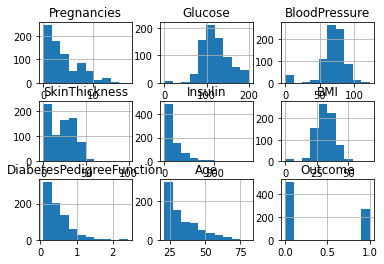

In [ ]:
# Displaying the graphs
df_.hist()
pyplot.show



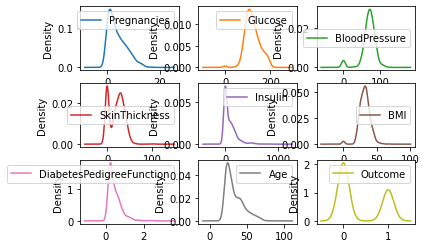

In [ ]:
# Displaying the Density Histogram
df_.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
pyplot.show()
